Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from wordcloud import WordCloud
import seaborn as sns
sns.set(style="whitegrid")


Load Data

In [4]:
df = pd.read_csv("../data/sentiment/sentiment_scores.csv")

Basic Cleaning

In [5]:
df['review_text'] = df['review_text'].astype(str)
df['bank_code'] = df['bank_code'].astype(str)


Sentiment Distribution Per Bank

In [6]:
sentiment_dist = (
    df.groupby(['bank_code', 'sentiment_label'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
    .rename("proportion")
)

sentiment_dist


bank_code  bank_code  sentiment_label
BOA        BOA        negative           0.1900
                      neutral            0.3200
                      positive           0.4900
CBE        CBE        negative           0.0775
                      neutral            0.3350
                      positive           0.5875
Dashen     Dashen     negative           0.1300
                      neutral            0.2250
                      positive           0.6450
Name: proportion, dtype: float64

Average Sentiment Score per Bank

In [7]:
avg_sentiment = df.groupby("bank_code")["sentiment_score"].mean()
avg_sentiment


bank_code
BOA       0.153618
CBE       0.274236
Dashen    0.311204
Name: sentiment_score, dtype: float64

Extract Top Positive & Negative Words

In [8]:
import re

def clean_words(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z]+", " ", text)
    return text.split()

positive_words = defaultdict(list)
negative_words = defaultdict(list)

for bank in df['bank_code'].unique():
    subset = df[df.bank_code == bank]
    
    pos_reviews = subset[subset.sentiment_label == "positive"]["review_text"]
    neg_reviews = subset[subset.sentiment_label == "negative"]["review_text"]
    
    pos_tokens = [w for t in pos_reviews for w in clean_words(t)]
    neg_tokens = [w for t in neg_reviews for w in clean_words(t)]
    
    positive_words[bank] = [w for w, _ in Counter(pos_tokens).most_common(10)]
    negative_words[bank] = [w for w, _ in Counter(neg_tokens).most_common(10)]

positive_words, negative_words


(defaultdict(list,
             {'BOA': ['it',
               'good',
               'app',
               'i',
               'to',
               'the',
               'and',
               'this',
               'is',
               'best'],
              'CBE': ['good',
               'app',
               'it',
               'to',
               'the',
               'i',
               'and',
               'is',
               'very',
               'best'],
              'Dashen': ['app',
               'the',
               'and',
               'it',
               'is',
               'to',
               'good',
               'i',
               'bank',
               'best']}),
 defaultdict(list,
             {'BOA': ['the',
               'app',
               'it',
               'to',
               'i',
               'and',
               'is',
               'this',
               'a',
               'worst'],
              'CBE': ['the',
               'it',
     

Visualization 1: Average Sentiment Score

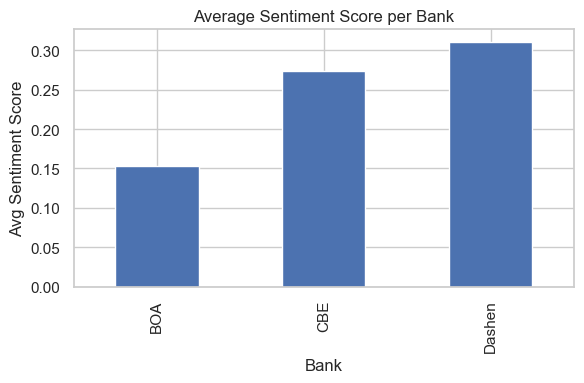

In [10]:
plt.figure(figsize=(6,4))
avg_sentiment.plot(kind="bar")
plt.title("Average Sentiment Score per Bank")
plt.ylabel("Avg Sentiment Score")
plt.xlabel("Bank")
plt.tight_layout()
plt.show()


Visualization 2: Positive Word Cloud per Bank

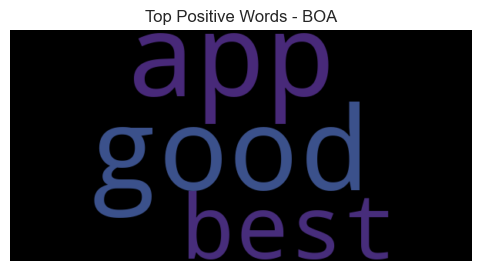

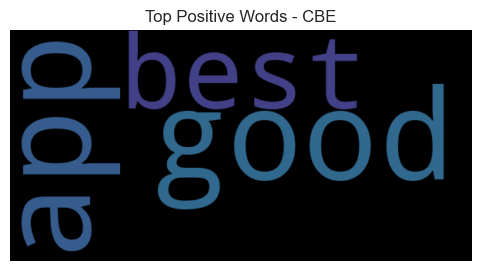

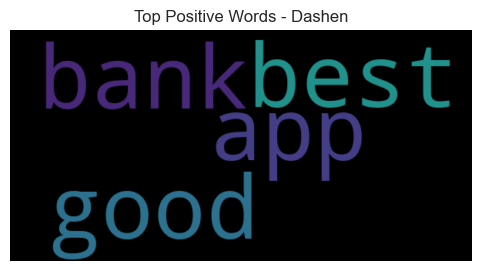

In [11]:
for bank in positive_words.keys():
    text = " ".join(positive_words[bank])
    wc = WordCloud(width=600, height=300).generate(text)
    
    plt.figure(figsize=(6,3))
    plt.imshow(wc, interpolation="bilinear")
    plt.title(f"Top Positive Words - {bank}")
    plt.axis("off")
    plt.show()


Visualization 3: Rating Distribution

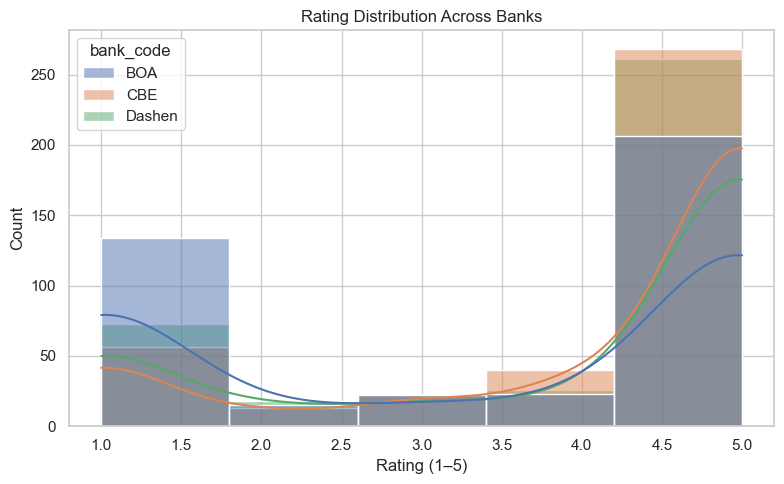

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="rating", bins=5, kde=True, hue="bank_code")
plt.title("Rating Distribution Across Banks")
plt.xlabel("Rating (1–5)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
